# HOUSE PRICE PREDICTION

IMPORTING MODULES

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
import os

GETTING THE DATA SET

In [44]:
h=pd.read_csv('data.csv')

GETTING INFORMATION ABOUT DATA

In [45]:
print(h)

               id             date   price  bedrooms  bathrooms  sqft_living  \
0      7129300520  20141013T000000  221900         3       1.00         1180   
1      6414100192  20141209T000000  538000         3       2.25         2570   
2      5631500400  20150225T000000  180000         2       1.00          770   
3      2487200875  20141209T000000  604000         4       3.00         1960   
4      1954400510  20150218T000000  510000         3       2.00         1680   
...           ...              ...     ...       ...        ...          ...   
21608   263000018  20140521T000000  360000         3       2.50         1530   
21609  6600060120  20150223T000000  400000         4       2.50         2310   
21610  1523300141  20140623T000000  402101         2       0.75         1020   
21611   291310100  20150116T000000  400000         3       2.50         1600   
21612  1523300157  20141015T000000  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  vi

In [46]:
print(h.shape)

(21613, 21)


In [47]:
print(h.head(10))

           id             date    price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900         3       1.00         1180   
1  6414100192  20141209T000000   538000         3       2.25         2570   
2  5631500400  20150225T000000   180000         2       1.00          770   
3  2487200875  20141209T000000   604000         4       3.00         1960   
4  1954400510  20150218T000000   510000         3       2.00         1680   
5  7237550310  20140512T000000  1230000         4       4.50         5420   
6  1321400060  20140627T000000   257500         3       2.25         1715   
7  2008000270  20150115T000000   291850         3       1.50         1060   
8  2414600126  20150415T000000   229500         3       1.00         1780   
9  3793500160  20150312T000000   323000         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180           

In [48]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [49]:
h.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [50]:
#checking for null values
h.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

EXPLORATORY DATA ANALYSIS

In [51]:
#drop the unwanted columns
h.drop(['view','grade','sqft_above','date'], axis='columns', inplace=True)


In [52]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  int64  
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  yr_renovated   21613 non-null  int64  
 12  zipcode        21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 2.8 MB


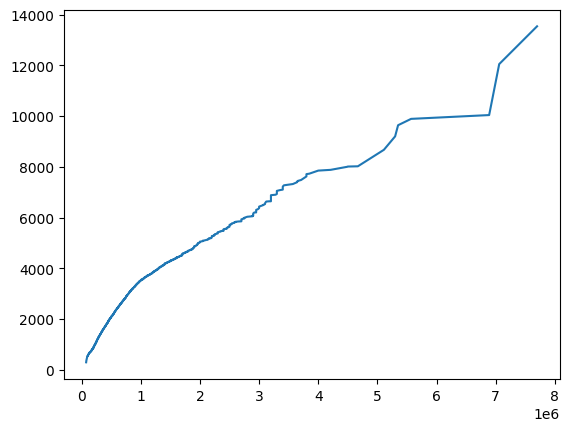

In [53]:
x_axis=sorted(h['price'])
y_axis=sorted(h['sqft_living'])
plt.plot(x_axis,y_axis)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

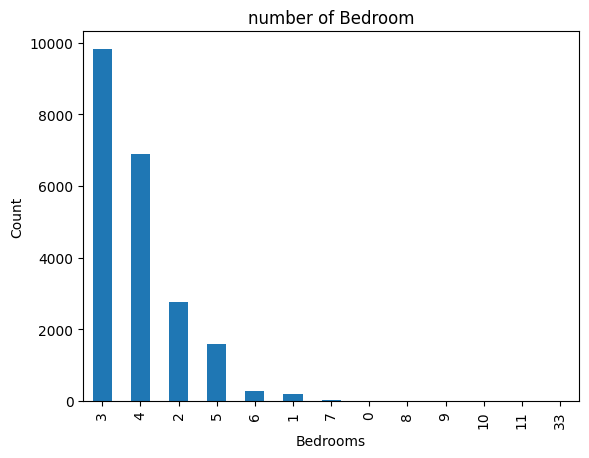

In [54]:
h['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

In [55]:
#assigning independent and dependent values
y=h[['price']].values
x=h[['sqft_living']].values

Text(0.5, 1.0, 'Price vs Square Feet')

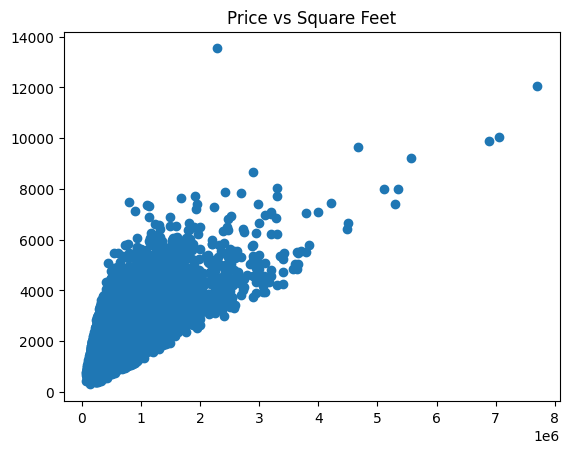

In [56]:

plt.scatter(h.price,h.sqft_living)
plt.title("Price vs Square Feet")


Text(0.5, 1.0, 'Latitude vs Price')

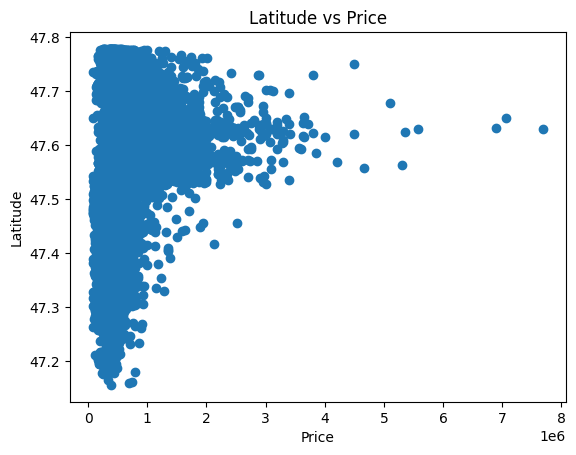

In [57]:
plt.scatter(h.price,h.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

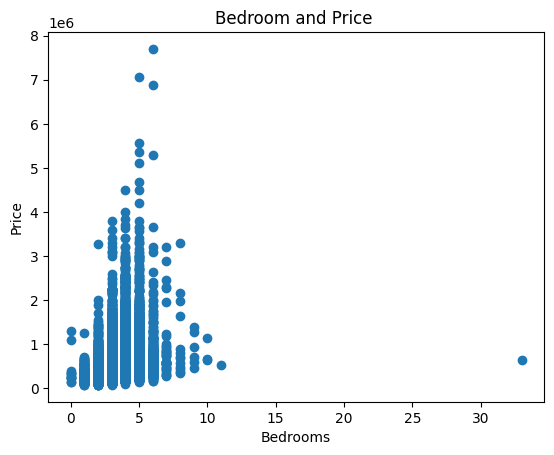

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [58]:
plt.scatter(h.bedrooms,h.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

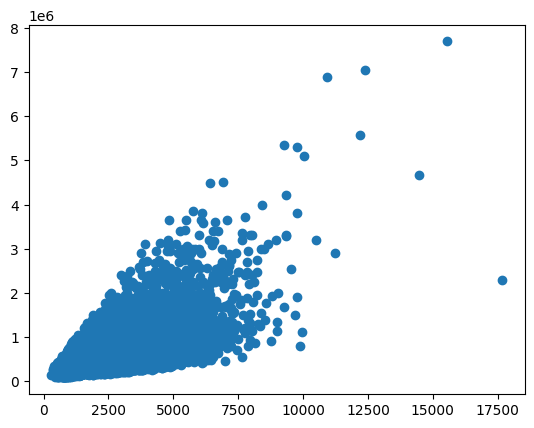

In [59]:
plt.scatter((h['sqft_living']+h['sqft_basement']),h['price'])

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

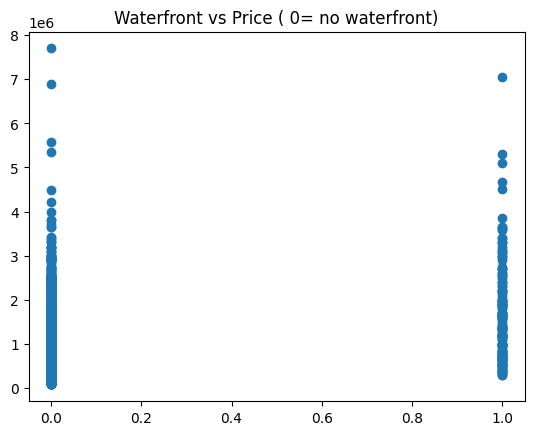

In [60]:
plt.scatter(h.waterfront,h.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

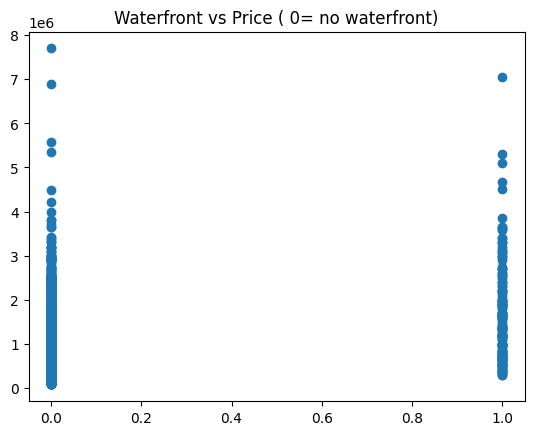

In [61]:
plt.scatter(h.waterfront,h.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

In [62]:
t1 = h.drop(['id', 'price'],axis=1)
t1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,3,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,3,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,3,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,5,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,3,0,1987,0,98074,47.6168,-122.045,1800,7503


<Axes: xlabel='floors'>

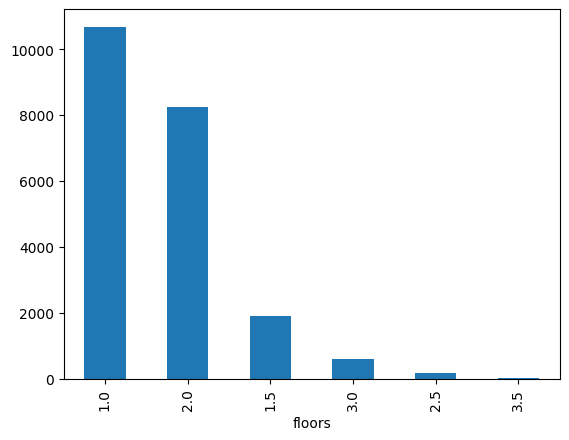

In [63]:
h.floors.value_counts().plot(kind='bar')

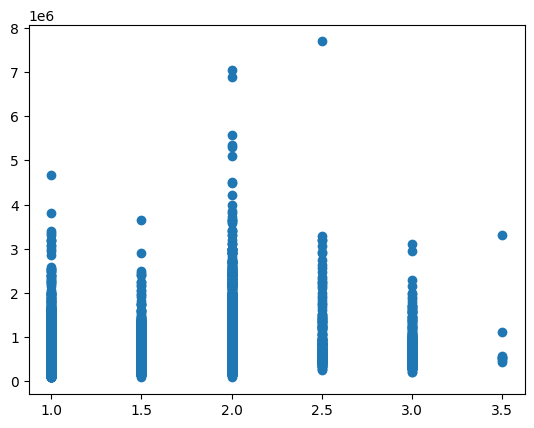

In [64]:
plt.scatter(h.floors,h.price)

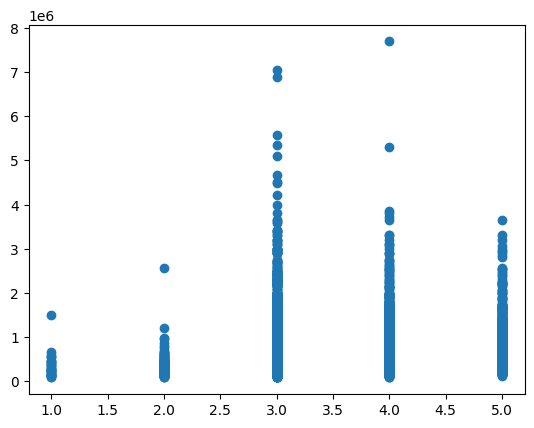

In [65]:
plt.scatter(h.condition,h.price)

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

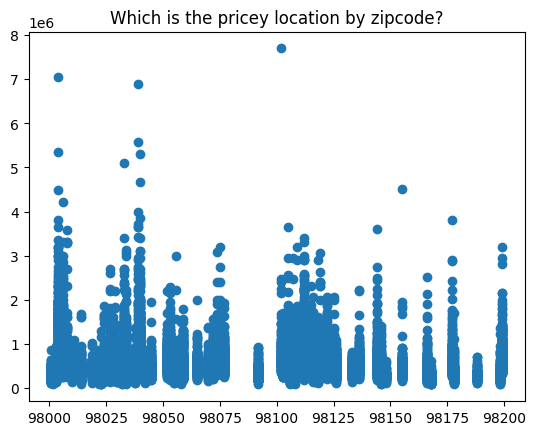

In [66]:
plt.scatter(h.zipcode,h.price)
plt.title("Which is the pricey location by zipcode?")

In [67]:
h.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,-0.023783,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.036392,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.028472,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,-0.124982,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,-0.058753,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,-0.008958,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,-0.263768,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.016653,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,1.000000,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
sqft_basement,-0.005151,0.323837,0.303093,0.283770,0.435043,0.015286,-0.245705,0.080588,0.174105,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276


Text(0.5, 1.0, 'House Prediction Features')

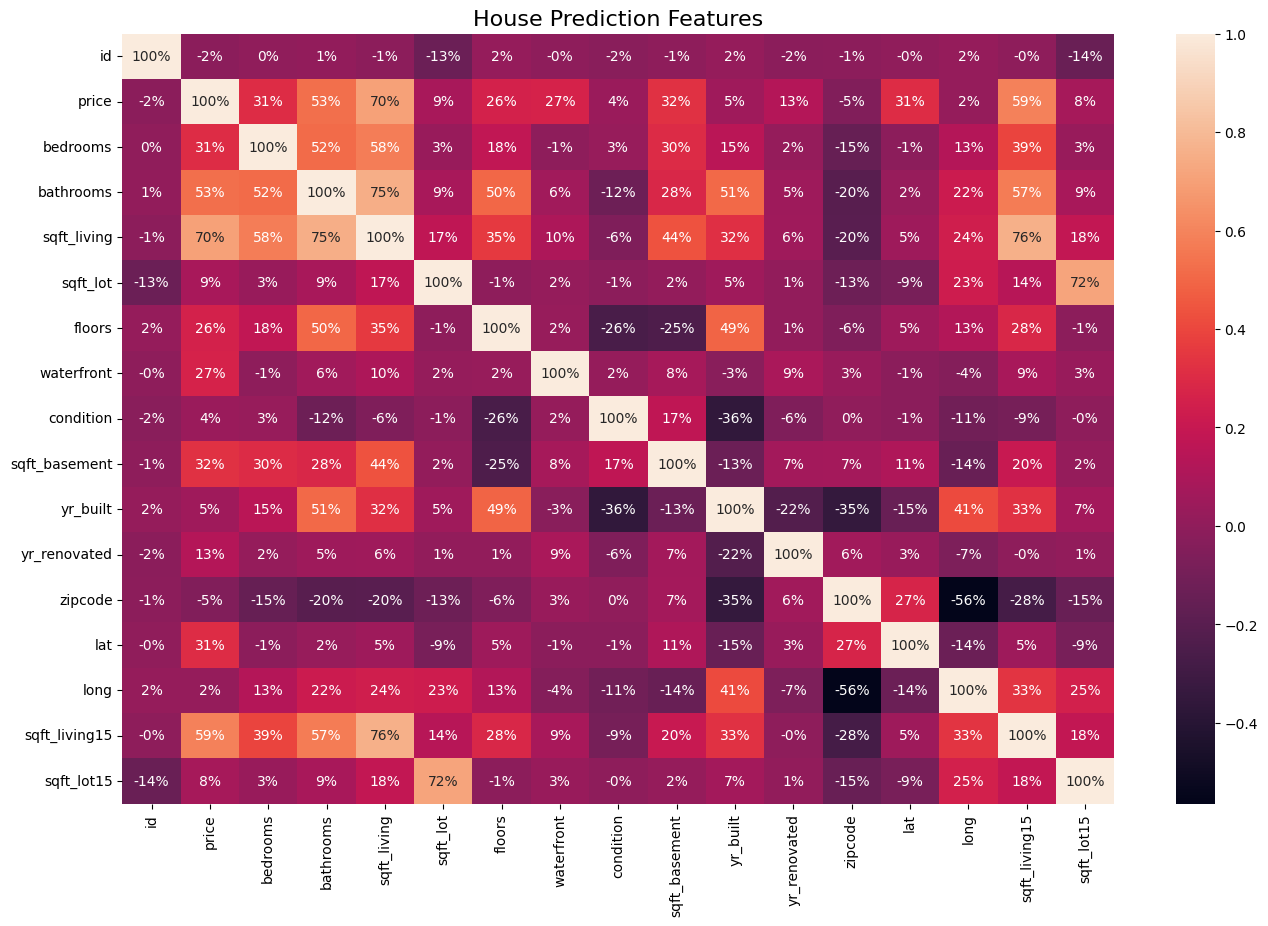

In [68]:
plt.figure(figsize = (16,10))
sns.heatmap(h.corr(), annot = True, fmt = '.0%')
plt.title("House Prediction Features", fontsize=16)

In [69]:
# ids that are duplicate
print("No. of Duplicate id:",len(h.loc[h.id.duplicated()]))
h.loc[h.id.duplicated(),['id','price']]

No. of Duplicate id: 177


,id,price
94,6021501535,700000
314,4139480200,1400000
325,7520000520,240500
346,3969300030,239900
372,2231500030,530000
...,...,...
20181,7853400250,645000
20613,2724049222,220000
20670,8564860270,502000
20780,6300000226,380000


TRAINING A LINEAR REGESSION MODEL

In [70]:
#Using all features to train model for Linear Regression 
x = h[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = h['price']

In [71]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [72]:
#fitting the model
r = LinearRegression()
r.fit(x_train,y_train)

LinearRegression()

In [73]:
r.predict(x_test)

array([481853.36630994, 595840.37461426, 520564.11466281, ...,
       757044.44274877, 132843.16689071, 897341.45383791])

In [74]:
#tested model
x_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3834,2,1.00,1050,6317,1.5,0,4,0,1913,0,98019,47.7364,-121.981,1600,9616
1348,4,2.25,2040,9565,1.0,0,3,640,1959,0,98133,47.7356,-122.335,1890,8580
20366,4,2.50,2500,4000,2.0,0,3,0,2014,0,98144,47.5902,-122.311,1480,4300
16617,5,2.00,2360,19899,1.0,0,4,0,1968,0,98010,47.3299,-122.046,1860,19998
20925,3,3.00,1670,4440,1.0,0,3,0,2014,0,98022,47.1948,-121.975,1670,4622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,3,1.75,1520,5500,1.5,0,5,0,1936,0,98116,47.5839,-122.383,2310,5500
2747,5,3.00,2970,10335,2.0,0,3,0,2000,0,98075,47.5980,-122.019,2970,10335
15565,3,2.50,3440,103672,2.0,0,3,0,1990,0,98038,47.3895,-121.986,2710,112820
21238,3,2.50,1572,4000,2.0,0,3,0,2013,0,98092,47.2615,-122.198,1608,5175


In [75]:
x_test.loc[7148]

bedrooms             3.0000
bathrooms            1.7500
sqft_living       1520.0000
sqft_lot          5500.0000
floors               1.5000
waterfront           0.0000
condition            5.0000
sqft_basement        0.0000
yr_built          1936.0000
yr_renovated         0.0000
zipcode          98116.0000
lat                 47.5839
long              -122.3830
sqft_living15     2310.0000
sqft_lot15        5500.0000
Name: 7148, dtype: float64

In [76]:
r.predict([[3,1,1520,5000,1,0,0,3,8,1000,1,1980,0,2000,5000]])

c:\Users\soumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.29019052e+09])

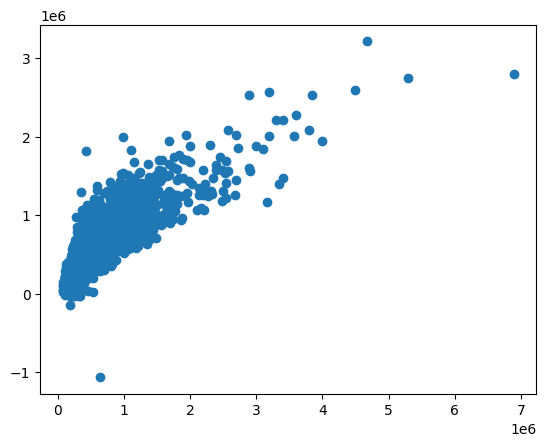

In [77]:
#predict
pred = r.predict(x_test)
plt.scatter(y_test,pred)

C:\Users\soumi\AppData\Local\Temp\ipykernel_16068\2360014346.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-pred),bins=50);


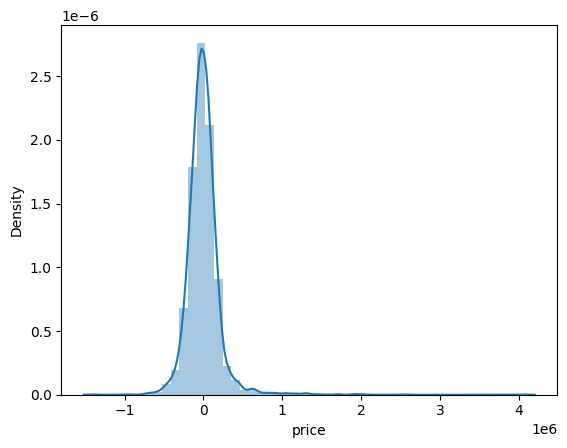

In [78]:
sns.distplot((y_test-pred),bins=50);

In [79]:
#predicting values
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 135418.21244429733
MSE: 46484430713.442375
RMSE: 215602.48308737628


In [80]:
#predicting accuracy
from sklearn.metrics import r2_score
print('R2 Score : ',r2_score(y_test, pred))

R2 Score :  0.6725684673055393


THE MODEL IS 67.25% ACCURATE

USING RANDOM FOREST MODEL

MAE: 78428.62997220439
MSE: 20930299644.744797
RMSE: 144673.07850718044
R2 Score :  0.850992792509302
Intercept: -13686713.064876646


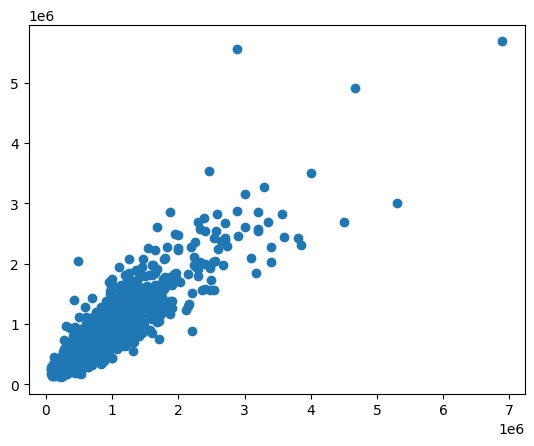

In [81]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

x = h[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 
        'condition', 'yr_built', 'lat', 'long']]
y = h['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

model = RandomForestRegressor(n_jobs=-1, n_estimators=35)
model.fit(x_train,y_train)
model.score(x_train,y_train)
pred=model.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2 Score : ',r2_score(y_test, pred))
print('Intercept:',r.intercept_)

plt.scatter(y_test,pred);

THE ACCURACY FOR RANDOM FOREST MODEL IS 84.44%

C:\Users\soumi\AppData\Local\Temp\ipykernel_16068\2360014346.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-pred),bins=50);


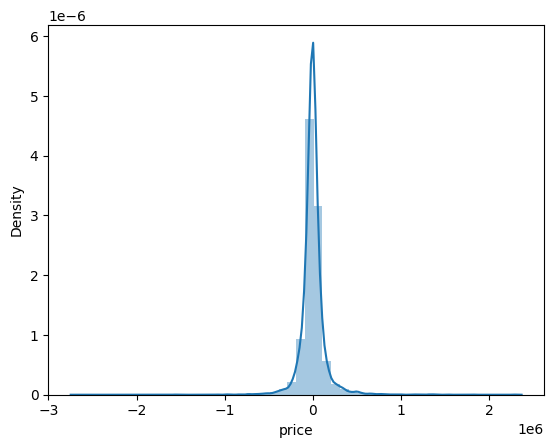

In [82]:
sns.distplot((y_test-pred),bins=50);

USING DECISION TREE

In [83]:
#Decision tree
X = h[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 
        'condition', 'yr_built', 'lat', 'long']]
y = h['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.tree import DecisionTreeRegressor
tr_regressor = DecisionTreeRegressor(random_state=1)

tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
print("Decision tree Score is ",round(tr_regressor.score(X_test,y_test)*100))

Decision tree Score is  74


In [84]:
pd.DataFrame({'R2 Score': ['68%', '84%', '74%'],}, 
                       index=['Linear Regressor', 'RandomForest Regressor', 'Decision Tree'])

,R2 Score
Linear Regressor,68%
RandomForest Regressor,84%
Decision Tree,74%


THEREFORE RANDOMFOREST REGRESSOR MODEL IS BETTER WITH GREATER ACCURACY